In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pandas.plotting import lag_plot
import statsmodels.formula.api as smf
from sklearn.preprocessing import LabelEncoder

In [2]:
ad = pd.read_excel("E:\\ExcelR\\Assingment\\Assignment 18\\Airlines+Data.xlsx")
ad

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [3]:
ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [4]:
ad.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


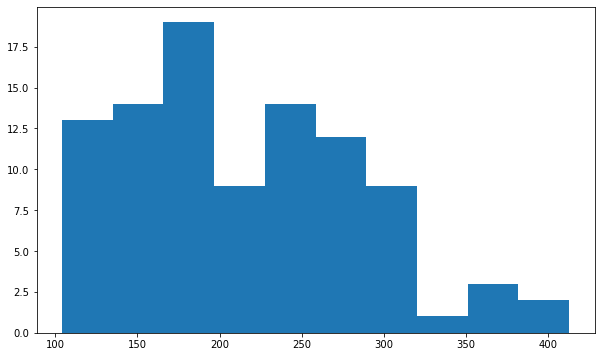

In [5]:
plt.figure(figsize = (10,6))
plt.hist(ad.Passengers)
plt.show()

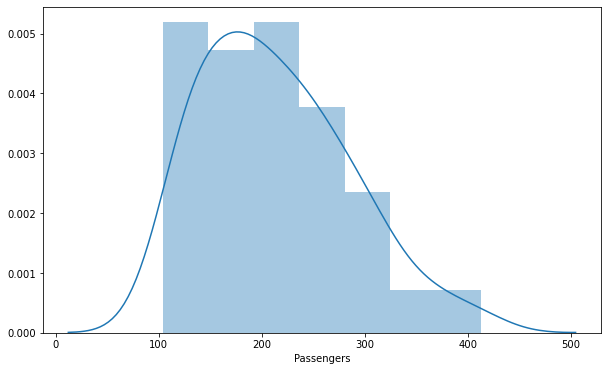

In [6]:
plt.figure(figsize = (10,6))
sns.distplot(ad["Passengers"])
plt.show()

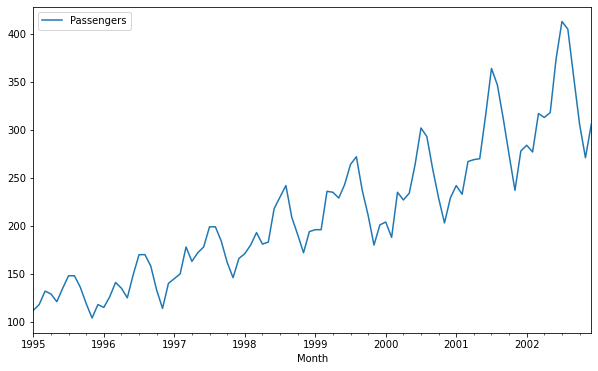

In [7]:
ad.plot(x='Month', figsize = (10,6))
plt.show()

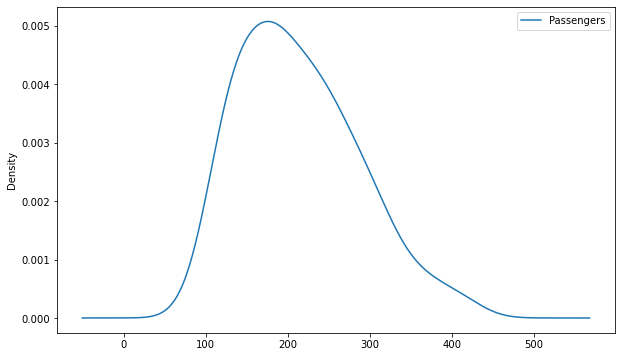

In [8]:
ad.plot(x = "Month", kind = "kde", figsize = (10,6))
plt.show()

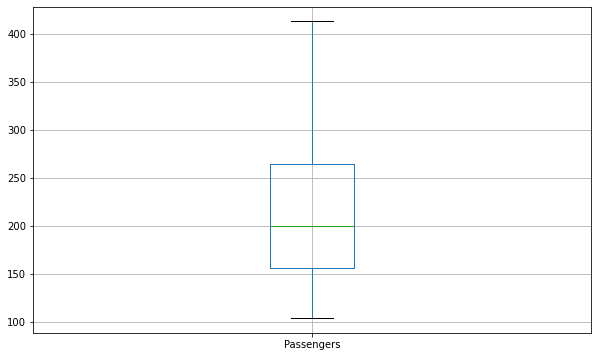

In [9]:
ad.boxplot(figsize = (10,6), grid = True)
plt.show()

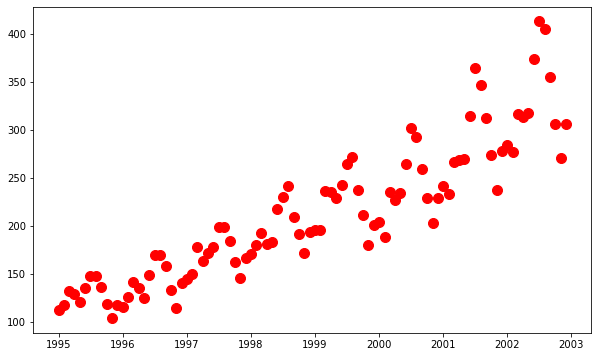

In [10]:
plt.figure(figsize = (10,6))
plt.scatter(x = ad.Month, y = ad.Passengers, c = "red", s = 100)
plt.show()

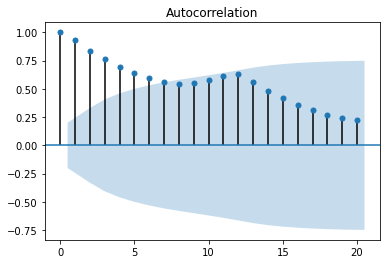

In [11]:
acf_plot = plot_acf(ad.Passengers)

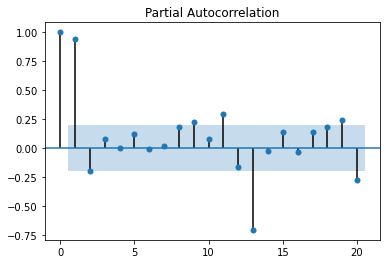

In [12]:
pacf_plot = plot_pacf(ad.Passengers)

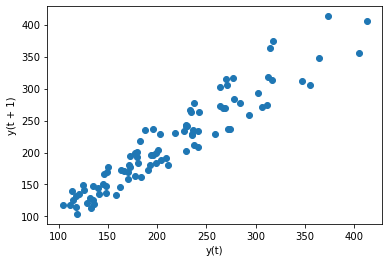

In [13]:
lag_plot = lag_plot(ad.Passengers)

In [14]:
ad.corr()

,Passengers
Passengers,1.0


In [15]:
ad.mean()

Passengers    213.708333
dtype: float64

In [16]:
ad.median()

Passengers    200.0
dtype: float64

In [17]:
ad.Passengers.mode()

0    229
dtype: int64

In [18]:
ad = ad.apply(LabelEncoder().fit_transform)

In [19]:
model = smf.ols("Month~Passengers", data = ad).fit()
model.params

Intercept     2.052790
Passengers    1.163759
dtype: float64

In [20]:
print(model.pvalues)

Intercept     3.273282e-01
Passengers    2.013162e-43
dtype: float64


In [21]:
print(model.tvalues)

Intercept      0.984641
Passengers    25.078055
dtype: float64


In [22]:
print(model.rsquared)

0.8699697708901726


In [23]:
print(model.rsquared_adj)

0.8685864705804935
